<a href="https://colab.research.google.com/github/EdgarAgOr/FAP_Cheminformatic_PET/blob/main/6_EDA_FAP_Molecules_Bemis_Murcko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
DATA = pd.read_csv('/content/FAP_Radiofarmacos_curada_data.csv')

In [ ]:
DATA

,Compuesto,SMILES,pEC50,Data Set,bioactivity_class
0,TriOncoFAP-DOTAGA,[3H][C@]1(C#N)CC(F)(F)CN1C(=O)CNC(=O)c1ccnc2c(...,10.886057,Molecules,Active
1,P-FAPI,O=C(NCC(=O)N1CC(F)(F)C[C@@H]1C#N)c1ccnc2ccc(OC...,10.136677,Molecules,Active
2,PD-FAPI,O=C(NCCOCCOCCOc1cc2c(nccc2C(=O)NCC(=O)N2C[C@](...,9.886057,Molecules,Active
3,FAP-46-F1D,O=C(O)CN1CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)NC(...,9.801618,Molecules,Active
4,DOTAGA-FAPI-FUSCC-II,O=C(O)C(CCC(=O)NCC(=O)NCC(=O)NCC(=O)Nc1cccc2c1...,9.769551,Molecules,Active
...,...,...,...,...,...
79,FAPI-55,O=C(NCC(=O)N1CC(F)(F)C[C@@H]1C#N)c1ccnc2ccc(cc...,0.000000,Molecules,Active
80,18FFEQGP,O=C(NCC(=O)N1CCC[C@H]1C#N)c1ccnc2ccc(OCC[18F])...,0.000000,Molecules,Active
81,FluoFAPI,O=C(NCC(=O)N1CCC[C@H]1C#N)c1ccnc2ccc(F)cc21,0.000000,Molecules,Active
82,HBED-CC-FAPI-04,O=C(NCC(=O)N1CC(F)(F)C[C@H]1C#N)c1ccnc2ccc(OCC...,0.000000,Molecules,Active


# Paqueterias a descargar

In [ ]:
# Estas son para analisis y visualizacion

import seaborn as sns

import matplotlib.pyplot as plt


In [ ]:
# Estas son para quimioinformatica

import pandas as pd
! pip install -q rdkit
! pip install -q molvs

import pandas as pd
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import rdMolDescriptors
from molvs.standardize import Standardizer
from molvs.charge import Uncharger, Reionizer
from molvs.fragment import LargestFragmentChooser
from molvs.tautomer import TautomerCanonicalizer
from rdkit.Chem.rdmolops import GetFormalCharge, RemoveStereochemistry

In [ ]:
from rdkit.Chem import AllChem

from rdkit.Chem import PandasTools

from rdkit.Chem import Descriptors

PandasTools.RenderImagesInAllDataFrames (images = True)

In [ ]:
print (f'DtaFrame shape: {DATA.shape}.')

DATA

DtaFrame shape: (84, 5).


,Compuesto,SMILES,pEC50,Data Set,bioactivity_class
0,TriOncoFAP-DOTAGA,[3H][C@]1(C#N)CC(F)(F)CN1C(=O)CNC(=O)c1ccnc2c(...,10.886057,Molecules,Active
1,P-FAPI,O=C(NCC(=O)N1CC(F)(F)C[C@@H]1C#N)c1ccnc2ccc(OC...,10.136677,Molecules,Active
2,PD-FAPI,O=C(NCCOCCOCCOc1cc2c(nccc2C(=O)NCC(=O)N2C[C@](...,9.886057,Molecules,Active
3,FAP-46-F1D,O=C(O)CN1CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)NC(...,9.801618,Molecules,Active
4,DOTAGA-FAPI-FUSCC-II,O=C(O)C(CCC(=O)NCC(=O)NCC(=O)NCC(=O)Nc1cccc2c1...,9.769551,Molecules,Active
...,...,...,...,...,...
79,FAPI-55,O=C(NCC(=O)N1CC(F)(F)C[C@@H]1C#N)c1ccnc2ccc(cc...,0.000000,Molecules,Active
80,18FFEQGP,O=C(NCC(=O)N1CCC[C@H]1C#N)c1ccnc2ccc(OCC[18F])...,0.000000,Molecules,Active
81,FluoFAPI,O=C(NCC(=O)N1CCC[C@H]1C#N)c1ccnc2ccc(F)cc21,0.000000,Molecules,Active
82,HBED-CC-FAPI-04,O=C(NCC(=O)N1CC(F)(F)C[C@H]1C#N)c1ccnc2ccc(OCC...,0.000000,Molecules,Active


In [ ]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Compuesto          84 non-null     object 
 1   SMILES             84 non-null     object 
 2   pEC50              84 non-null     float64
 3   Data Set           84 non-null     object 
 4   bioactivity_class  84 non-null     object 
dtypes: float64(1), object(4)
memory usage: 3.4+ KB


,Compuesto,SMILES,pEC50,Data Set,bioactivity_class,ROMol
0,TriOncoFAP-DOTAGA,[3H][C@]1(C#N)CC(F)(F)CN1C(=O)CNC(=O)c1ccnc2c(...,10.886057,Molecules,Active,
1,P-FAPI,O=C(NCC(=O)N1CC(F)(F)C[C@@H]1C#N)c1ccnc2ccc(OC...,10.136677,Molecules,Active,
2,PD-FAPI,O=C(NCCOCCOCCOc1cc2c(nccc2C(=O)NCC(=O)N2C[C@](...,9.886057,Molecules,Active,
3,FAP-46-F1D,O=C(O)CN1CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)NC(...,9.801618,Molecules,Active,
4,DOTAGA-FAPI-FUSCC-II,O=C(O)C(CCC(=O)NCC(=O)NCC(=O)NCC(=O)Nc1cccc2c1...,9.769551,Molecules,Active,

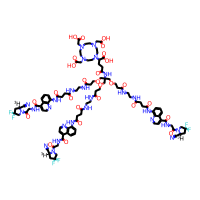
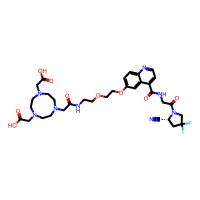
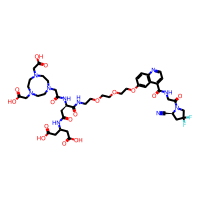
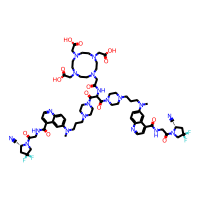
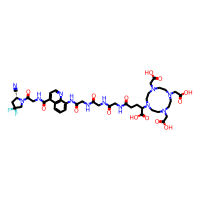

In [ ]:
PandasTools.AddMoleculeColumnToFrame(DATA, 'SMILES')
# con esto mostramos solo las primeras cinco lineas
DATA [0:5]

In [ ]:
DATA ['MW']= DATA['ROMol'].apply(Descriptors.ExactMolWt)

,Compuesto,SMILES,pEC50,Data Set,bioactivity_class,ROMol,MW
0,TriOncoFAP-DOTAGA,[3H][C@]1(C#N)CC(F)(F)CN1C(=O)CNC(=O)c1ccnc2c(...,10.886057,Molecules,Active,,2250.912365
1,P-FAPI,O=C(NCC(=O)N1CC(F)(F)C[C@@H]1C#N)c1ccnc2ccc(OC...,10.136677,Molecules,Active,,732.304281
2,PD-FAPI,O=C(NCCOCCOCCOc1cc2c(nccc2C(=O)NCC(=O)N2C[C@](...,9.886057,Molecules,Active,,1020.400032
3,FAP-46-F1D,O=C(O)CN1CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)NC(...,9.801618,Molecules,Active,,1467.682337

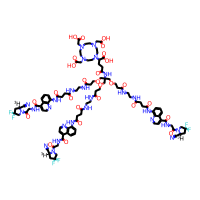
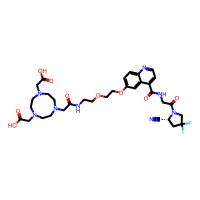
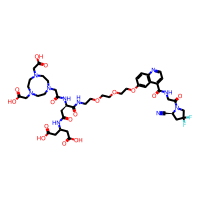
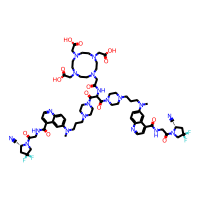

In [ ]:
DATA [0:4]

,HBA,HBD,RotBonds,LogP,TPSA,CSP3,MW,NumRings,ROMol
0,33,17,57,-1.16246,739.12,0.504950,2252.254148,10,
1,12,4,16,-0.67522,217.97,0.545455,732.742000,4,
2,17,8,28,-2.34952,360.00,0.568182,1020.998000,4,

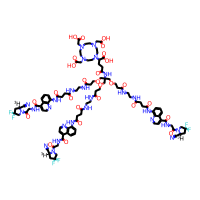
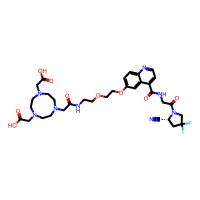
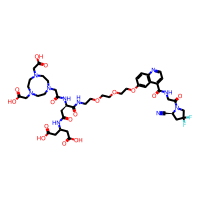

In [ ]:
DATA["HBA"] = [Descriptors.NumHAcceptors(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
DATA["HBD"] = [Descriptors.NumHDonors(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
DATA["RotBonds"] = [Descriptors.NumRotatableBonds(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
DATA["LogP"] = [Descriptors.MolLogP(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
DATA["TPSA"] = [Descriptors.TPSA(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
#DATA["HetAtoms"] = [Descriptors.NumHeteroatoms(y) for y in (Chem.MolFromSmiles(x) for x in DATA["canonical_smiles"])]
DATA["CSP3"] = [Descriptors.FractionCSP3(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
DATA["ARR"] = [Descriptors.NumAromaticRings(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
DATA["MW"] = [Descriptors.MolWt(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
#DATA["ALR"] = [Descriptors.NumAliphaticRings(y) for y in (Chem.MolFromSmiles(x) for x in DATA["canonical_smiles"])]
DATA["NumRings"] = [Descriptors.RingCount(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]

DATA [['HBA','HBD','RotBonds','LogP','TPSA','CSP3','MW','NumRings', 'ROMol']] [0:3]

In [ ]:
DATA.describe()

,pEC50,MW,HBA,HBD,RotBonds,LogP,TPSA,CSP3,ARR,NumRings
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,5.967434,1143.051109,17.500000,6.869048,26.023810,-0.098323,335.013571,0.560967,2.952381,5.952381
std,3.969869,486.964011,7.240282,3.944738,15.530752,1.982384,145.983569,0.081154,1.413402,2.110814
min,0.000000,326.331000,4.000000,1.000000,3.000000,-6.037120,86.090000,0.294118,1.000000,3.000000
25%,0.000000,854.938000,14.000000,4.000000,16.000000,-1.184320,243.730000,0.520308,2.000000,5.000000
50%,7.953910,964.063500,16.000000,6.000000,21.500000,-0.393230,294.305000,0.593350,2.000000,5.000000
75%,8.715835,1421.160500,20.250000,9.000000,33.000000,0.756425,393.177500,0.611882,4.000000,6.000000
max,10.886057,3772.212000,57.000000,21.000000,114.000000,4.420980,978.140000,0.701493,8.000000,17.000000


In [ ]:
# Vamos a guardar este df

DATA.to_csv("Bioactividad_FAP_Activos.csv", index = False)

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x = "MW", y = 'LogP', data = DATA, hue = 'bioactivity_class', size = "standard_value", edgecolor = 'black', alpha= 0.7)

plt.xlabel('MW', fontsize = 14, fontweight = 'bold')

plt.ylabel('LogP', fontsize = 14, fontweight = 'bold')

plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad =0)

plt.savefig('plot_MW_vs_LogP.pdf')

#

In [ ]:
plt.figure(figsize=(5.5,5.5))

sns.scatterplot(x= "MW", y="TPSA", data=DATA, hue="bioactivity_class", size = "standard_value", edgecolor= "black", alpha=0.7)

plt.xlabel("MW", fontsize = 14, fontweight="bold")
plt.ylabel("TPSA", fontsize = 14, fontweight= "bold")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig("plot_TPSA_vs_MW.pdf")

In [ ]:
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x= "bioactivity_class", y = "standard_value", data = DATA)

plt.xlabel("Bioactivity_class", fontsize=14, fontweight="bold")
plt.ylabel("pIC50 value", fontsize=14, fontweight="bold")

plt.savefig("plot_ic50.pdf")

In [ ]:
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x= "bioactivity_class", y = "pIC50", data = DATA)

plt.xlabel("Bioactivity_class", fontsize=14, fontweight="bold")
plt.ylabel("pIC50 value", fontsize=14, fontweight="bold")

plt.savefig("plot_ic50.pdf")

In [ ]:
plt.figure(figsize=(5.5,5.5))

sns.countplot(x="bioactivity_class", data= DATA, edgecolor="black")

plt.xlabel("Bioactivity class", fontsize= 14, fontweight="bold")

plt.ylabel("Frequency", fontsize=14, fontweight="bold")

plt.savefig("plot_bioactivity_class.pdf")

In [ ]:
df_FAP = DATA [DATA['bioactivity_class']== 'Active']
hist = sns.histplot (x= 'TPSA', data = df_FAP)

hist.axes.set_title('TPSA', fontsize = 18)

hist.set_xlabel('TPSA', fontsize=14)

hist.set_ylabel('Count', fontsize=14)

hist.tick_params(labelsize=14)

In [ ]:
df_FAP_descriptors= DATA[['HBA','HBD','RotBonds','LogP','TPSA','HetAtoms','CSP3','ARR','MW','ALR','NumRings']]
#Histograma
df_FAP_descriptors.hist(figsize=(12,12), color="slateblue")
plt.show()
plt.savefig('mol_desc_dist.pdf')

In [ ]:
import numpy as np

In [ ]:
joint_plt = sns.jointplot (x = 'LogP', y = 'MW', data = DATA, kind = 'reg')

In [ ]:
sns.pairplot(DATA[['HBA','HBD','RotBonds','LogP','TPSA','HetAtoms','CSP3','ARR','MW','ALR','NumRings']], corner = 'True')
# corner = 'True' omite la representacion de la mitad superior de la matriz

In [ ]:
#Importar la  función PearsonR del módulo "stats" de la librería SciPy
from scipy.stats import pearsonr
#Definir una función para obtener la correlación entre dos variables
def get_corr(col1, col2, temp_df):
    pearson_corr, p_value = pearsonr(temp_df[col1], temp_df[col2])
    print("La correlación entre {} y {} es {:.2f}".format(col1, col2, pearson_corr))
    print("El valor-P de esta correlación es {:.^e}".format(p_value))
#Usamos la función para obtener la correlación entre logP y TPSA
get_corr('TPSA', 'MW', DATA)

In [ ]:
PandasTools.AddMurckoToFrame(DATA, 'ROMol')

DATA[['canonical_smiles', 'Murcko_SMILES']]
DATA.to_csv("Murko_Notation", index = False)

In [ ]:
PandasTools.AddMoleculeColumnToFrame(DATA, smilesCol= 'Murcko_SMILES', molCol= 'scaffold')

DATA

In [ ]:
DATA_b= DATA.copy()
#Eliminar columnas tipo Mol
DATA_b.drop("ROMol", axis=1, inplace=True)
DATA_b.drop("scaffold", axis=1, inplace=True)

In [ ]:
#Conservar columnas seleccionadas
DATA_b = DATA_b[['canonical_smiles','Murcko_SMILES', 'HBA','HBD','RotBonds','LogP','TPSA','CSP3','MW','NumRings']]

In [ ]:
#Visualizar copia del dataframe
print(f"DataFrame shape: {DATA_b.shape}")
DATA_b.head(2)

In [ ]:
#Agrupar datos por scaffold y contarlos
amount = DATA_b.groupby(['Murcko_SMILES']).size()
print(f"Dataset with {amount.shape[0]} different entries:",amount.sort_values(ascending=False))
#Nuevo dataframe con SMILES de scaffolds y su conteo, ordenados de mayor a menor
DATA_sca_all = pd.DataFrame (amount, columns = ['Amount'] )
DATA_sca_all=DATA_sca_all.sort_values(by='Amount', ascending= False)
DATA_sca_all=DATA_sca_all.reset_index(level=None, drop=False)
print ('All:', DATA_sca_all.shape, DATA_sca_all.columns)
DATA_sca_all

In [ ]:
#El dataframe cuenta con moléculas sin scaffold (moléculas lineales con fila vacía), anotamos en la línea la leyenda "Linear molecule":
DATA_sca_all.at[1, 'Murcko_SMILES']='Linear molecule'

In [ ]:
#Añadir columna de frecuencia, considerar el número total de registros para el cálculo.
DATA_sca_all.reset_index(drop=True, inplace=True)
DATA_sca_all["Frecuency"] = (DATA_sca_all['Amount'] / 1677)*100
print(f"Total Frecuency in Database: {sum(DATA_sca_all['Frecuency'])}, different entries:{sum(DATA_sca_all['Amount'])}, different Murcko Smiles:",
      len(DATA_sca_all['Murcko_SMILES']) )
DATA_sca_all = DATA_sca_all[['Murcko_SMILES', 'Amount', 'Frecuency']]
DATA_sca_all

In [ ]:
#Añadir columna tipo Mol al dataframe con frecuencias de scaffolds
PandasTools.AddMoleculeColumnToFrame(DATA_sca_all, smilesCol='Murcko_SMILES')
DATA_sca_all[0:1]

In [ ]:
#Visualizar scaffolds con su conteo
PandasTools.FrameToGridImage(DATA_sca_all[0:10], column='ROMol', legendsCol='Amount', molsPerRow=5)

In [ ]:
DATA_sca_all

In [ ]:
#Importar módulos necesarios:
import os
from rdkit.Chem import RDConfig
import sys
sys.path.append(os.path.join(RDConfig.RDContribDir, 'SA_Score'))
import sascorer

In [ ]:
#Calcular SAscore
SAlist = []

for mol in DATA['ROMol']:
    SA = sascorer.calculateScore(mol)
    SAlist.append(SA)
DATA['SA']=SAlist
DATA

In [ ]:
#Graficar boxplot
ax = sns.boxplot(x="bioactivity_class", y="SA", data=DATA, palette="Blues")
#Título de ejes
plt.xlabel('bioactivity_class', size=14)
plt.ylabel('SAscore', size=14)
plt.savefig('SAscore_vs_bioactivity_class.pdf')

In [ ]:
DATA_Active = DATA [DATA['bioactivity_class']== 'Active']
DATA_Active_descriptors = DATA_Active[['HBA','HBD','RotBonds','LogP','TPSA','CSP3','MW','NumRings']]
#Graficamos boxplots para todas las variables:
ax = sns.boxplot(data=DATA_Active_descriptors, orient="h", palette="rainbow")
#Especificamos tamaño de la figura con Matplotlib:
plt.gcf().set_size_inches(10, 5)
plt.show()

In [ ]:
#Vuelvo a graficar los boxplots:
ax = sns.boxplot(data=DATA_Active_descriptors, orient="h", palette="rainbow")
#Eje x en escala logarítmica:
ax.set_xscale('symlog')
#Especifico desde dónde hasta dónde quiero que me grafique el eje x:
ax.axis(xmin=-25, xmax=1500)
#Tamaño de la figura:
plt.gcf().set_size_inches(10, 5)

In [ ]:
# Calculamos la correlación con el coeficiente de Pearson usando Pandas:
correlation = DATA_Active_descriptors.corr(method='pearson')
# Creamos una nueva figura con Matplotlib y definimos el tamaño:
fig=plt.gcf()
fig.set_size_inches(8,8)
# Heatmap de correlación usando Seaborn:
sns.heatmap(correlation, annot=False,square=True)

In [ ]:
import numpy as np

In [ ]:
#Calcular correlación
correlation = DATA_Active_descriptors.corr()
# np.triu es una función de Numpy que proporciona el triángulo superior de una matriz cuadrada
upper_triangle = np.triu(correlation)
fig=plt.gcf()
fig.set_size_inches(8,8)
sns.heatmap(data=correlation,mask=upper_triangle,square=True,annot=True)

In [ ]:
pip -V

In [ ]:
#Instalar librería para raincloud plots, reiniciar la sesión si al final de la celda aparece la advertencia
!pip install ptitprince

In [ ]:
#Importar librerías necesarias después de reiniciar la sesión
import pandas as pd
import ptitprince as pt
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid") #Estilo predeterminado de las gráficas
import matplotlib.collections as clt

In [ ]:
#Graficar las "nubes"
f, ax = plt.subplots(figsize=(7, 5))
dy="bioactivity_class"; dx="SA"; ort="h"; pal = sns.color_palette(n_colors=1)

ax=pt.half_violinplot( x = dx, y = dy, data = df, palette = pal,
      bw = .2, cut = 0.,scale = "area", width = .6, inner = None,
      orient = ort)